**Viola-Jones algorithm** - haar-like features to detect facial properties. 
The cascade works like a series of filters to detect a face through its features.

https://github.com/opencv/opencv/tree/master/data/haarcascades

**Haar cascades needed for the face-eyes-smile detection:**

*haarcascade_frontalface_default.xml

*haarcascade_eye.xml

*haarcascade_smile.xml


In [0]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from google.colab import files
from google.colab.patches import cv2_imshow

In [11]:
file=files.upload()

Saving haarcascade_eye.xml to haarcascade_eye.xml
Saving haarcascade_frontalface_default.xml to haarcascade_frontalface_default (1).xml
Saving haarcascade_smile.xml to haarcascade_smile (1).xml
Saving lena.jpg to lena (2).jpg


In [12]:
!ls

 haarcascade_eye.xml			   'lena (2).jpg'
'haarcascade_frontalface_default (1).xml'   lena.jpg
 haarcascade_frontalface_default.xml	   'photo1 (1).jpg'
'haarcascade_smile (1).xml'		    photo1.jpg
 haarcascade_smile.xml			    sample_data
'lena (1).jpg'


In [0]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_eye.xml")
smile_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_smile.xml")

img = cv2.imread('lena.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

**Number of nearest neighbors** n, means the unknown face will be tested based on the weight of its n nearest neighbors

**detectMultiScale** function, first argument is the image, 2nd argument is the scaling factor will reduce the image size and 3rd is the number of nearest neighbors

**Face data** is tuples of coordinates.

x and y define the coordinates of the upper-left corner of the face frame, while w and h define the width and height of the frame.

**cv2.rectangle** function takes in the arguments frame, upper-left coordinates of the face, lower right coordinates.

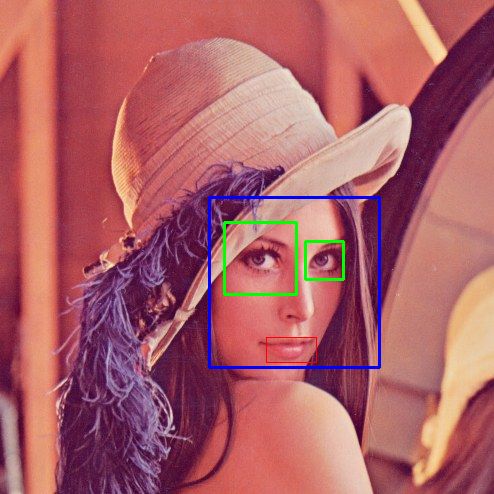

In [101]:
faces = face_cascade.detectMultiScale(gray, 1.1, 5)
for (x,y,w,h) in faces:
   
     cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
     roi_gray = gray[y:y+h, x:x+w]
     roi_color = img[y:y+h, x:x+w]
     smile = smile_cascade.detectMultiScale(roi_gray, 1.4, 5)
     eyes = eye_cascade.detectMultiScale(roi_gray, 1.9, 5)
     
     for (ex,ey,ew,eh) in eyes:
         cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
     for (ex,ey,ew,eh) in smile:
         cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,0,255),1)
cv2_imshow(img)


**Another example**

In [52]:
new=files.upload()

Saving photo1.jpg to photo1 (2).jpg


In [0]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_eye.xml")
smile_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_smile.xml")

img = cv2.imread('photo1.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

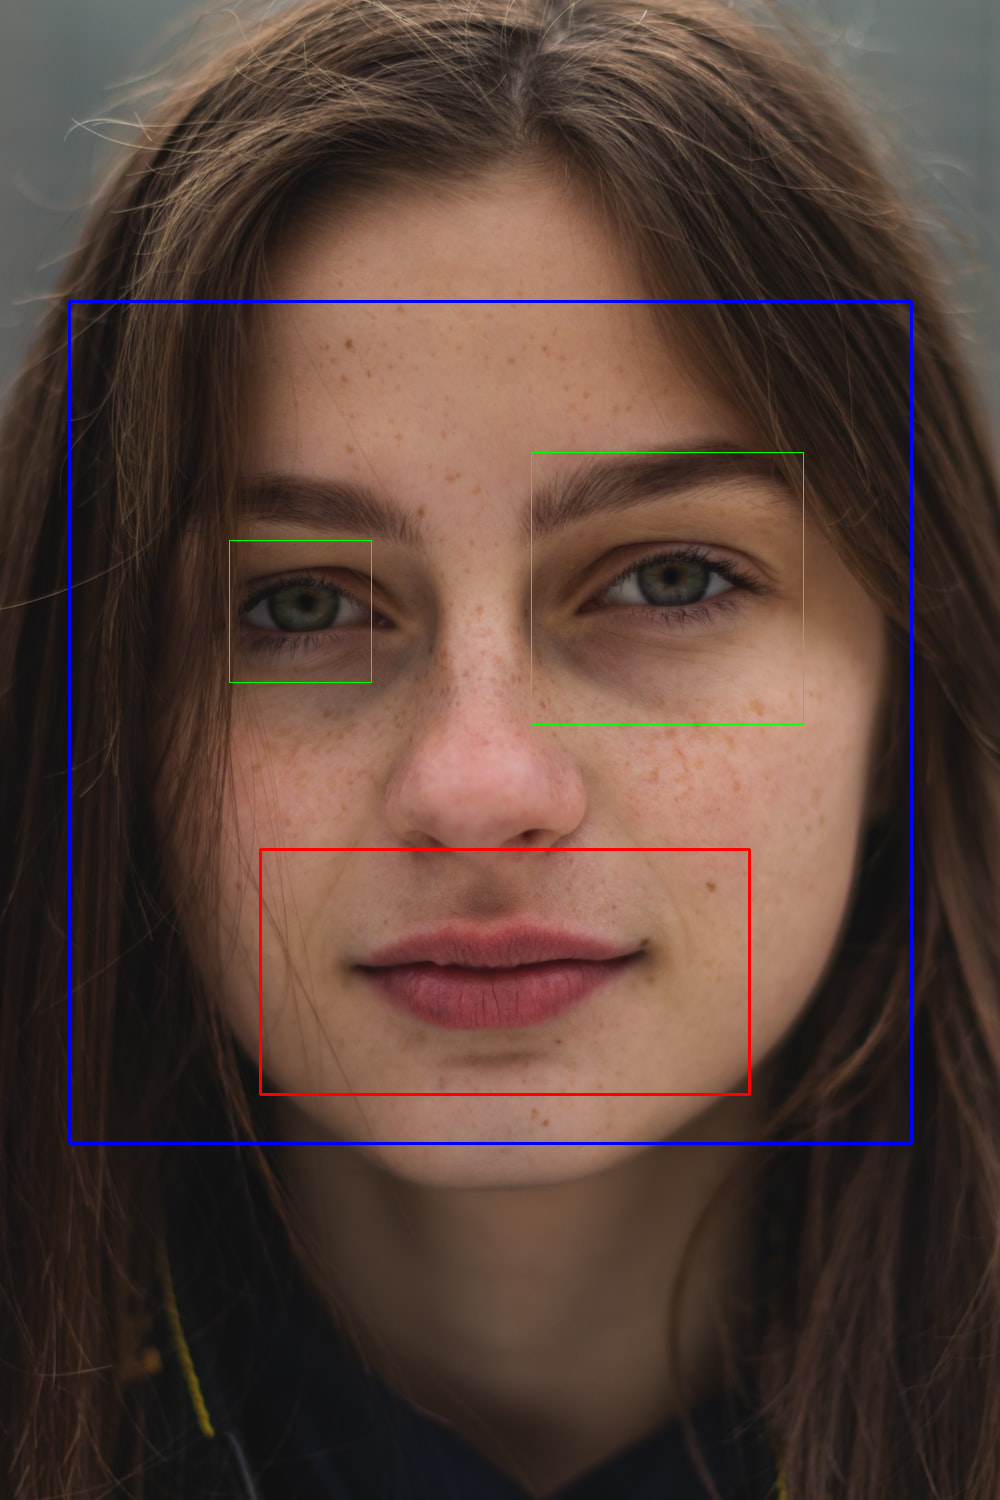

In [91]:
faces = face_cascade.detectMultiScale(gray, 1.1, 5)
for (x,y,w,h) in faces:
     cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
     roi_gray = gray[y:y+h, x:x+w]
     roi_color = img[y:y+h, x:x+w]
     smile = smile_cascade.detectMultiScale(roi_gray, 1.92, 6)
     eyes = eye_cascade.detectMultiScale(roi_gray, 1.92, 5)
     
     for (ex,ey,ew,eh) in eyes:
         cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),1)
     for (ex,ey,ew,eh) in smile:
         cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,0,255),2)
cv2_imshow(img)